In [3]:
from examples.wmt_2020.common.util.reader import read_annotated_file, read_test_file
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

TRAIN_FILE = "data/en-de/train.ende.df.short.tsv"
DEV_FILE = "data/en-de/dev.ende.df.short.tsv"
TEST_FILE = "data/en-de/test20.ende.df.short.tsv"

train = read_annotated_file(TRAIN_FILE)
dev = read_annotated_file(DEV_FILE)
test = read_test_file(TEST_FILE)

train[:10]

,index,original,translation,z_mean
0,0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,1.119409
1,1,"However, a disappointing ninth in China meant ...",Eine enttäuschende Neunte in China bedeutete j...,-0.488591
2,2,"In his diary, Chase wrote that the release of ...","In seinem Tagebuch, Chase schrieb, dass die Ve...",-2.207007
3,3,Heavy arquebuses mounted on wagons were called...,Schwere Arquebuses auf Waggons montiert wurden...,-0.799946
4,4,Once North Pacific salmon die off after spawni...,Sobald der nordpazifische Lachs nach dem Laich...,0.381633
5,5,They engaged in crossfire at Guamaní River Bri...,Sie verübten Kreuzfeuer an der Guamaní River B...,-0.660120
6,6,"Several WHA teams courted Gretzky, notably the...","Mehrere WHA-Teams umworben Gretzky, insbesonde...",0.325186
7,7,16 Penn State in which redshirt freshman Jim K...,"16 Penn State, in dem Rothemd-Neuling Jim Kell...",-0.463563
8,8,"On 12 April 1983, the Landmarks Preservation C...",Am 12. April 1983 ernannte die Landmarks Prese...,0.034587
9,9,"After that, Chinese junks came to northern Bor...","Danach kamen chinesische Junks mit Gewürzen, V...",-0.652128


In [5]:
train.describe()

,z_mean
count,7000.000000
mean,-0.007638
std,0.836197
min,-7.541931
25%,-0.177584
50%,0.162328
75%,0.422116
max,2.743416


In [6]:
dev.describe()

,z_mean
count,1000.000000
mean,-0.049280
std,0.746840
min,-4.825809
25%,-0.541951
50%,0.211338
75%,0.526965
max,1.267143


mean-original 14.02 std-original 4.41 mean-translation 13.92 std-translation 4.52 max-original 28.00 max-translation 30.00


<Figure size 432x288 with 0 Axes>

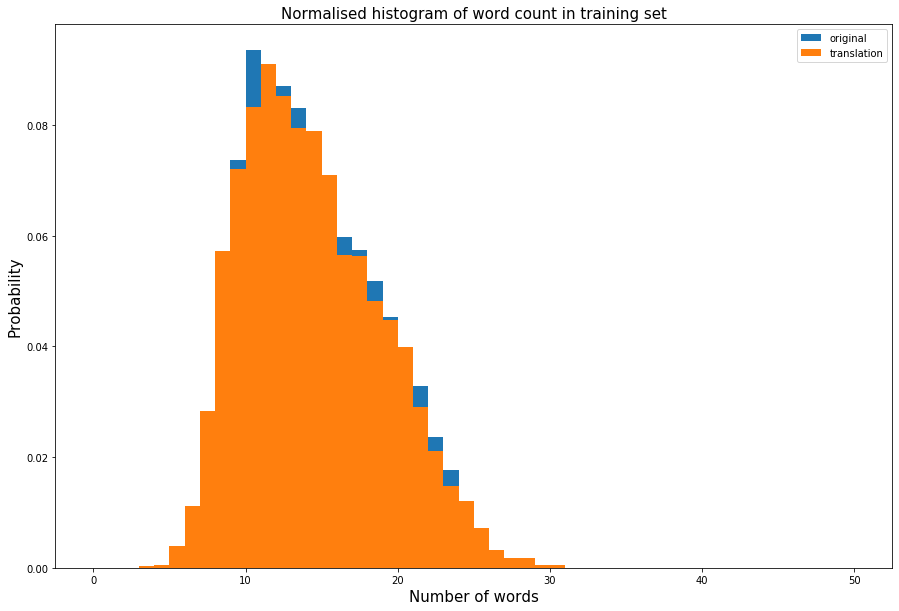

In [4]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(train['original'].tolist()).astype(str)
translation_qs = pd.Series(train['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in training set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))

mean-original 14.10 std-original 4.42 mean-translation 14.00 std-translation 4.63 max-original 28.00 max-translation 34.00


<Figure size 432x288 with 0 Axes>

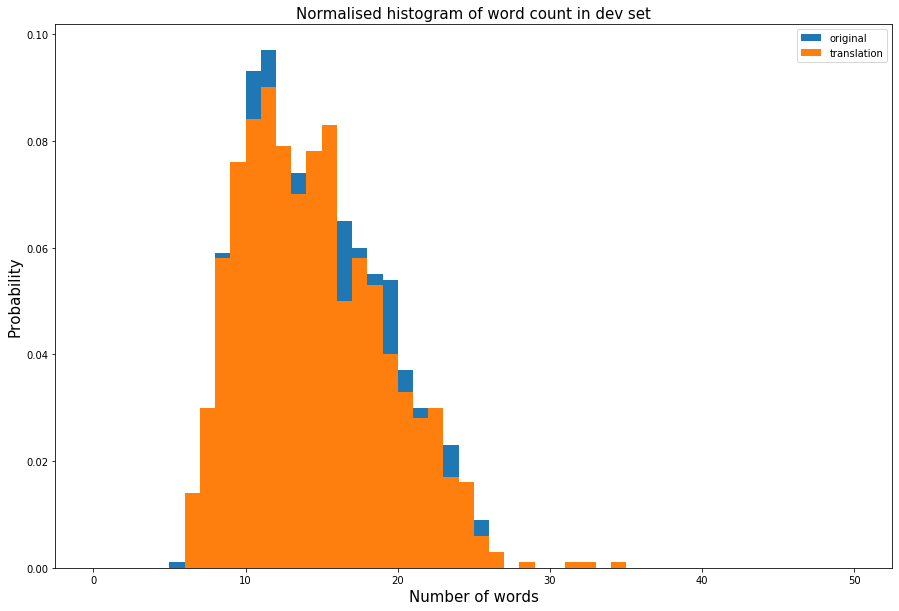

In [7]:

import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(dev['original'].tolist()).astype(str)
translation_qs = pd.Series(dev['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in dev set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))





